In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
files.upload()

{}

In [ ]:
df=pd.read_csv('Chapter4_Geomechanics_DataSet.csv')
df.head(3)

,Closure Pressure (psi),YM (MMpsi),PR
0,11421.78048,4.744385,0.369135
1,10775.65592,4.745286,0.353307
2,11682.04701,4.734561,0.347007


In [ ]:
#Let's standardize the data 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [ ]:
#here we should import the KNN to get the ebsilom before everything
from sklearn.neighbors import NearestNeighbors
neighbors=NearestNeighbors(n_neighbors=6)
#n_neighbors=6 since the dataframe is of 3D, so >2D, then 2*Dimension--->2*3=6
nbrs=neighbors.fit(df_scaled)
distances, indexes=nbrs.kneighbors(df_scaled)
#2 arrays will be formed distances and indexes


In [ ]:
pd.DataFrame(distances)

,0,1,2,3,4,5
0,0.0,0.099873,0.115069,0.185944,0.197953,0.207980
1,0.0,0.117686,0.135861,0.185534,0.186446,0.192409
2,0.0,0.153631,0.153778,0.153778,0.191159,0.198055
3,0.0,0.129170,0.159961,0.185534,0.201169,0.255252
4,0.0,0.127270,0.127407,0.131986,0.154922,0.170797
...,...,...,...,...,...,...
1002,0.0,0.230941,0.381821,0.383565,0.466496,0.488639
1003,0.0,0.103195,0.138093,0.155665,0.160783,0.162148
1004,0.0,0.160783,0.164397,0.172723,0.198536,0.229399
1005,0.0,0.059398,0.120097,0.124309,0.154100,0.162148


Text(0, 0.5, 'KNN distances')

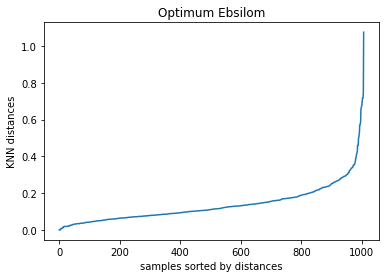

In [ ]:
distances=np.sort(distances, axis=0)
distances=distances[:, 1]   #to get 1 dimension
#if we used distances of the whole dimensions, many curves will form
plt.plot(distances)
plt.title('Optimum Ebsilom')
plt.xlabel('samples sorted by distances')
plt.ylabel('KNN distances')

In [ ]:
from sklearn.cluster import DBSCAN
clustering=DBSCAN(eps=0.3, min_samples=6, metric='euclidean')
DB=clustering.fit_predict(df_scaled)


In [ ]:
labels=pd.DataFrame(DB, columns=['clusters'])
labels.value_counts()

#-1 tells us that these are outliers!!

clusters
 0          534
 3          175
-1          171
 7           74
 2           19
 5           16
 1            6
 4            6
 6            6
dtype: int64

In [ ]:
df_new=pd.DataFrame(df_scaled, columns=df.columns)
df_new['clusters']=DB
df_new.head()

,Closure Pressure (psi),YM (MMpsi),PR,clusters
0,0.868920,-0.646624,1.805568,0
1,0.576779,-0.644344,1.565685,0
2,0.986597,-0.671476,1.470202,0
3,0.578261,-0.645142,1.751212,0
4,0.197986,-0.628157,0.082645,0


In [ ]:
df_new.groupby(by='clusters').count()

,Closure Pressure (psi),YM (MMpsi),PR
clusters,,,
-1,171,171,171
0,534,534,534
1,6,6,6
2,19,19,19
3,175,175,175
4,6,6,6
5,16,16,16
6,6,6,6
7,74,74,74


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


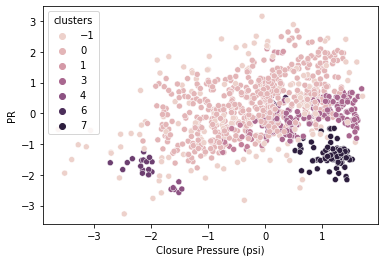

In [ ]:
sns.scatterplot(df_new['Closure Pressure (psi)'], df_new['PR'], hue=df_new['clusters'])

In [ ]:
df_inversed=scaler.inverse_transform(df_scaled)
df_inversed=pd.DataFrame(df_inversed, columns=df.columns)
df_inversed['clusters']=DB
df_inversed

,Closure Pressure (psi),YM (MMpsi),PR,clusters
0,11421.780480,4.744385,0.369135,0
1,10775.655920,4.745286,0.353307,0
2,11682.047010,4.734561,0.347007,0
3,10778.932700,4.744971,0.365548,0
4,9937.883140,4.751685,0.255453,0
...,...,...,...,...
1002,9563.050842,4.956995,0.395388,-1
1003,7683.981966,4.651399,0.266581,0
1004,7328.404834,4.651376,0.266708,0
1005,7884.131274,4.651383,0.257703,0


In [ ]:
df_inversed.value_counts(df_inversed['clusters'])

clusters
 0    534
 3    175
-1    171
 7     74
 2     19
 5     16
 1      6
 4      6
 6      6
dtype: int64

In [ ]:
df_inversed.groupby(by='clusters').mean()

,Closure Pressure (psi),YM (MMpsi),PR
clusters,,,
-1,8559.793037,5.093396,0.251311
0,9103.960541,4.721808,0.269245
1,9923.596429,4.698262,0.379895
2,8606.599018,5.568932,0.193529
3,11174.840159,5.501811,0.244704
4,6056.031667,4.748750,0.089047
5,4659.041890,4.633106,0.140071
6,9868.632336,4.483827,0.268370
7,12060.862432,5.624898,0.159915
